# Level 4 Individual Project - Identifying motifs of tumour tissue architecture with deep representation learning

* Name: **Shorya Singh**
* Guid: **2224727s**
* Supervisor: **Dr Ke Yuan**

## Notebook 1: A look at the data, dimensionality reduction with PCA, sample clustering with kmeans, visualization
-------------------------------------------------------------------------------------------------------------------------------

## Dependencies

In [1]:
!pip install h5py==2.10.0

In [22]:
#!pip install "notebook>=5.3" "ipywidgets>=7.5"

In [23]:
#!pip install plotly==5.3.1

In [14]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Reading the files and a basic look at the data

In [2]:
f = h5py.File(r'C:\Users\Shorya\GLA\GLA YEAR 4\Project\Data\COAD_pge_feature.h5', 'r')

In [2]:
list(f.keys())

['file_name', 'images_w_latent']

In [3]:
file_name = f['file_name']
images_w_latent = f['images_w_latent']
print(file_name.shape)
print(images_w_latent.shape)

(2441581,)
(2441581, 200)


In [4]:
# A look at the data
print(file_name[90:95])
images_w_latent[90:92, 0:5]

['train_TCGA-CM-6680-01A-01-BS1.481058f9-945b-4062-8adb-28624d1c0c8b_83_43.jpeg'
 'train_TCGA-CM-6678-01A-01-BS1.7e1b10ec-65da-45ed-bddc-2376624abb46_109_52.jpeg'
 'train_TCGA-G4-6317-02A-01-BS1.870c2e2e-7f4f-4d06-bac3-5e48c4d9d09d_10_19.jpeg'
 'train_TCGA-G4-6297-01A-01-BS1.f781af7c-fa7d-4f4a-8a48-3109962da419_44_57.jpeg'
 'train_TCGA-A6-3810-01B-03-BS3.A7C6B755-37C3-4E01-9FA8-93787D9FB702_50_47.jpeg']


array([[ 0.43577957, -1.120127  , -0.04169318, -0.56578624,  0.04212779],
       [ 1.4862664 , -1.5089244 , -0.35897267, -0.7730421 ,  0.1802318 ]],
      dtype=float32)

In [4]:
# looking at the patient mutation data
coad_mutation=pd.read_csv(r'C:\Users\Shorya\GLA\GLA YEAR 4\Project\Data\COAD_mutation.csv')  

In [17]:
print(coad_mutation.shape)
patient_data.head()

(461, 19501)


,Unnamed: 0,LRRC38,SMPDL3B,C1orf50,IGSF3,FCGR1A,LCE1A,TMEM79,IQGAP3,SPTA1,...,RPL12,PHB2,RP11-315D16.2,CFD,KISS1R,CHCHD10,TMEM41B,C19orf33,MIR155HG,case_barcode
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,TCGA-AA-3975
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-AA-A00R
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-AY-A69D
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-A6-2672
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA-CA-6715


In [ ]:
# # Strip file_name for barcodes
# import numpy as np
# barcodes = np.empty_like(file_name)
# for i in range(len(file_name)):
#   temp = file_name[i]
#   barcodes[i] = temp[6:18]


In [ ]:
# # Find label of a data point
# def find_cluster_label(barcode,c_label):
#   i = np.where(barcodes==barcode)
#   return(c_label[i])

## PCA of image representations (image_w_latent)

In [7]:
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standardize the data
#images_w_latent_std = X_std = StandardScaler().fit_transform(images_w_latent)

# PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(images_w_latent)

<IPython.core.display.Javascript object>


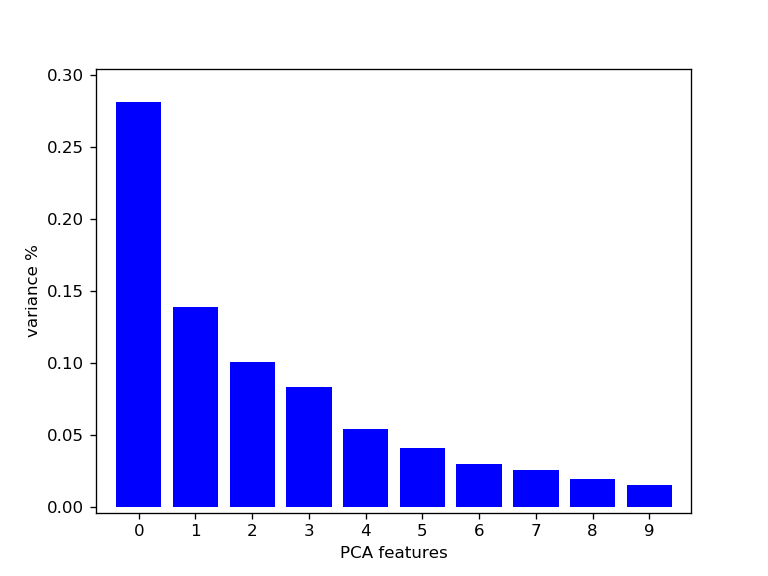

([<matplotlib.axis.XTick at 0x1548a306b08>,
 <a list of 10 Text xticklabel objects>)

In [8]:
pca_features = range(pca.n_components_)
plt.bar(pca_features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(pca_features)

In [8]:
PCA_components = pd.DataFrame(principalComponents)

## Using inertia to find appropriate number of clusters

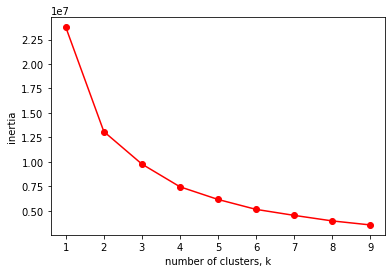

In [10]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## KMeans clustering of PCA reduced image reprsentations on 2 dominant PCA axes with k = 4, 5, 2

In [12]:
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(PCA_components.iloc[:,:2])

<IPython.core.display.Javascript object>


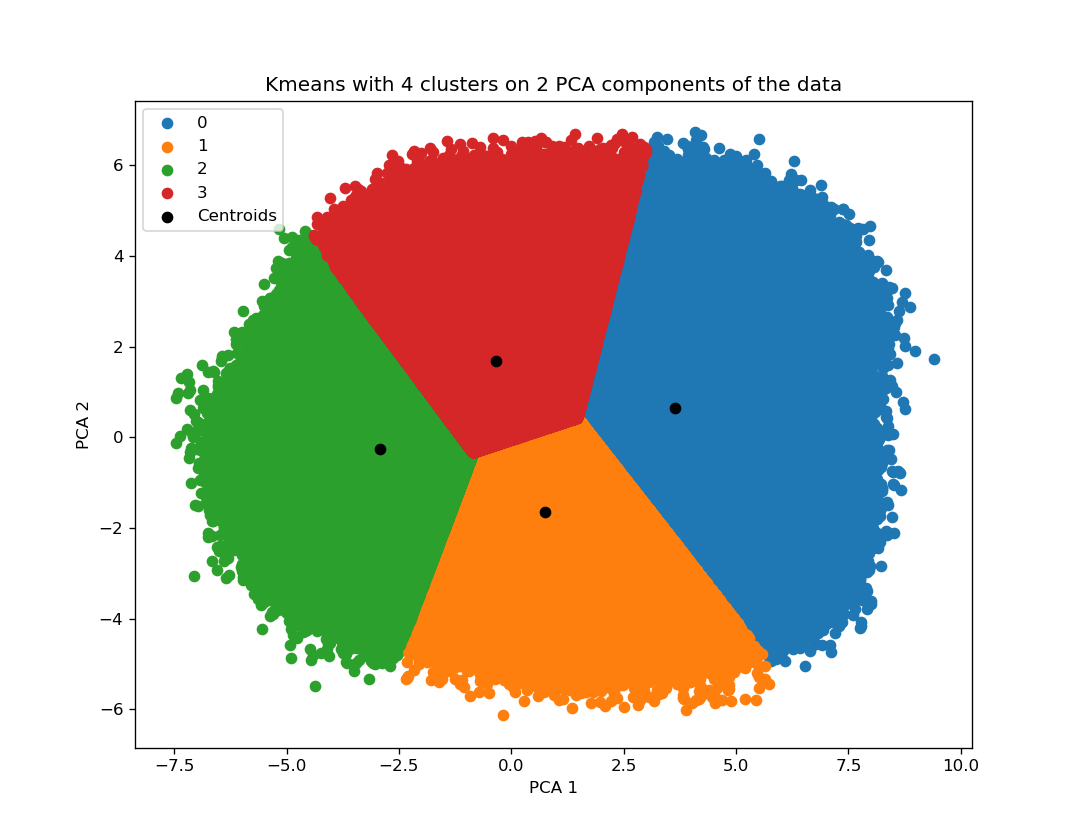

In [18]:
u_labels = np.unique(label)
data_PCA_2=PCA_components.iloc[:,:2] 
figure(figsize=(9, 7))
 
for i in u_labels:
    temp = data_PCA_2[label==i]
    plt.scatter(temp.iloc[: , 0] , temp.iloc[:, 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label = 'Centroids')
plt.title('Kmeans with 4 clusters on 2 PCA components of the data')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()



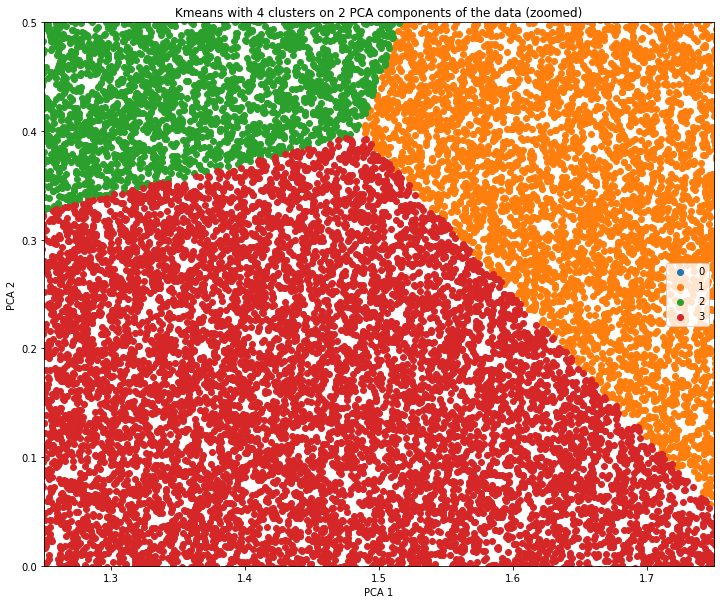

In [18]:
u_labels = np.unique(label)
data_PCA_2=PCA_components.iloc[:,:2] 
figure(figsize=(12, 10))
 
for i in u_labels:
    temp = data_PCA_2[label==i]
    plt.scatter(temp.iloc[: , 0] , temp.iloc[:, 1] , label = i)
plt.xlim([1.25, 1.75])
plt.ylim([0, 0.5])
plt.title('Kmeans with 4 clusters on 2 PCA components of the data (zoomed)')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [23]:
sil_pca_k_4 = silhouette_score(PCA_components.iloc[:,:2], label, sample_size = 50000, random_state=0)
print(f'Silhouette Score for k means with k = 4: {sil_pca_k_4}')

Silhouette Score for PCA features with k = 4: 0.3428495228290558


In [29]:
kmeans_pca_5 = KMeans(n_clusters= 5)
label_pca_5 = kmeans_pca_5.fit_predict(PCA_components.iloc[:,:2])

<IPython.core.display.Javascript object>


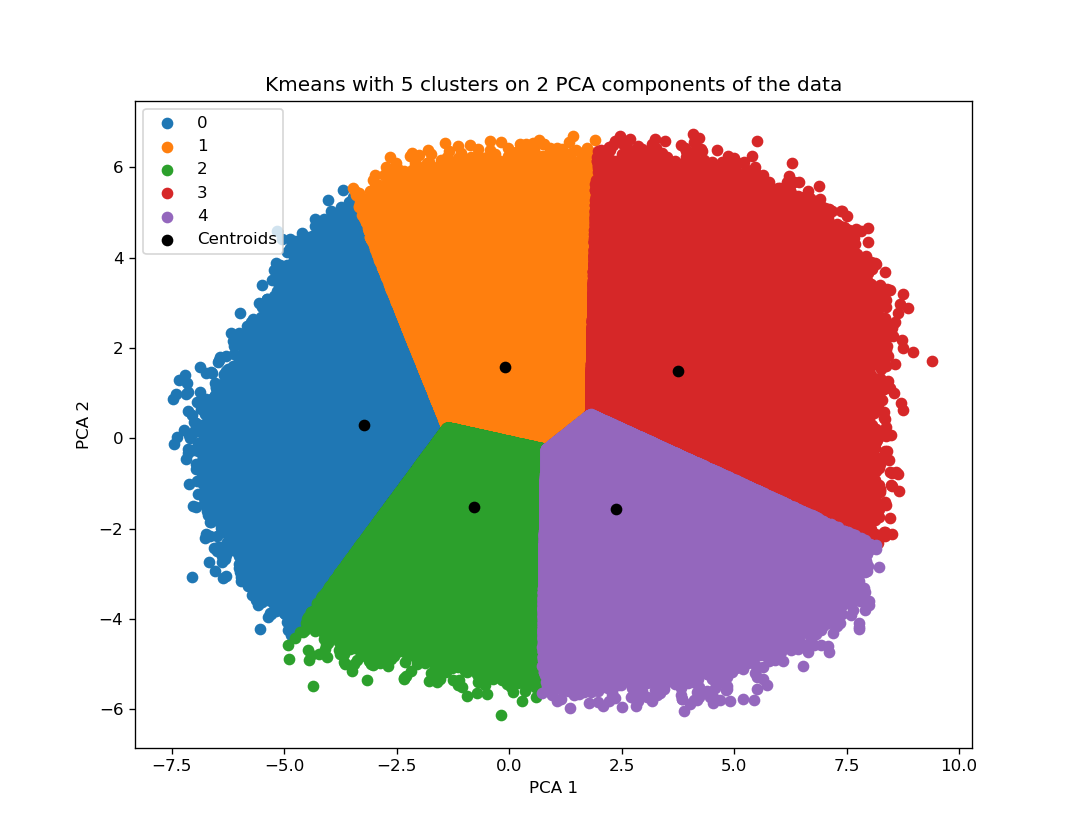

In [31]:
u_labels = np.unique(label_pca_5)
data_PCA_2=PCA_components.iloc[:,:2] 
figure(figsize=(9, 7))
 
for i in u_labels:
    temp = data_PCA_2[label_pca_5==i]
    plt.scatter(temp.iloc[: , 0] , temp.iloc[:, 1] , label = i)
plt.scatter(kmeans_pca_5.cluster_centers_[:, 0], kmeans_pca_5.cluster_centers_[:, 1], c='black', label = 'Centroids')
plt.title('Kmeans with 5 clusters on 2 PCA components of the data')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [32]:
sil_pca_k_5 = silhouette_score(PCA_components.iloc[:,:2], label_pca_5, sample_size = 50000, random_state=0)
print(f'Silhouette Score for kmeans with k = 5: {sil_pca_k_5}')

Silhouette Score for PCA features with k = 4: 0.33046719431877136


In [36]:
kmeans_pca_2 = KMeans(n_clusters= 2)
label_pca_2 = kmeans_pca_2.fit_predict(PCA_components.iloc[:,:2])

<IPython.core.display.Javascript object>


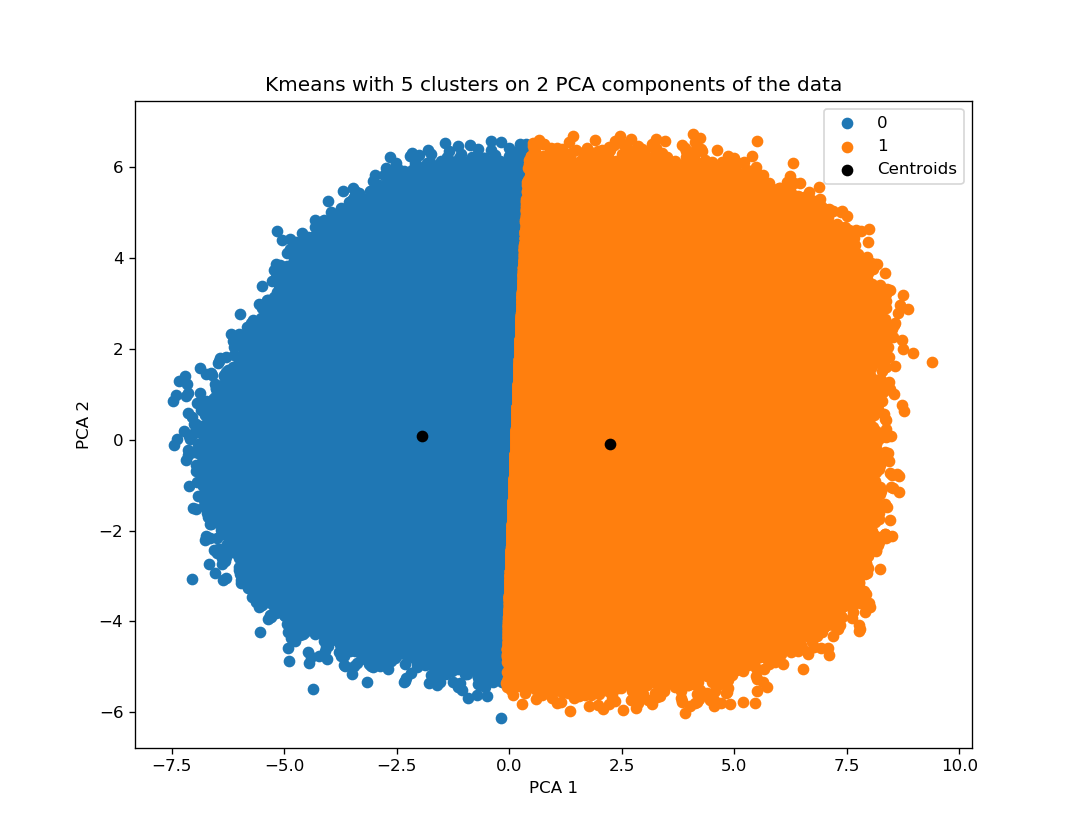

In [37]:
u_labels = np.unique(label_pca_2)
data_PCA_2=PCA_components.iloc[:,:2] 
figure(figsize=(9, 7))
 
for i in u_labels:
    temp = data_PCA_2[label_pca_2==i]
    plt.scatter(temp.iloc[: , 0] , temp.iloc[:, 1] , label = i)
plt.scatter(kmeans_pca_2.cluster_centers_[:, 0], kmeans_pca_2.cluster_centers_[:, 1], c='black', label = 'Centroids')
plt.title('Kmeans with 5 clusters on 2 PCA components of the data')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [38]:
sil_pca_k_2 = silhouette_score(PCA_components.iloc[:,:2], label_pca_2, sample_size = 50000, random_state=0)
print(f'Silhouette Score for kmeans with k = 2: {sil_pca_k_2}')

Silhouette Score for PCA features with k = 4: 0.3868730962276459


## (MiniBatch) Kmeans with k = 2,4 on all image features, visualized on 3 dominant PCA axes

In [11]:
M_B_kmeans_2 = MiniBatchKMeans(n_clusters=2, random_state = 0, batch_size = 50000)
label_M_B_2 = M_B_kmeans_2.fit_predict(images_w_latent)

<IPython.core.display.Javascript object>


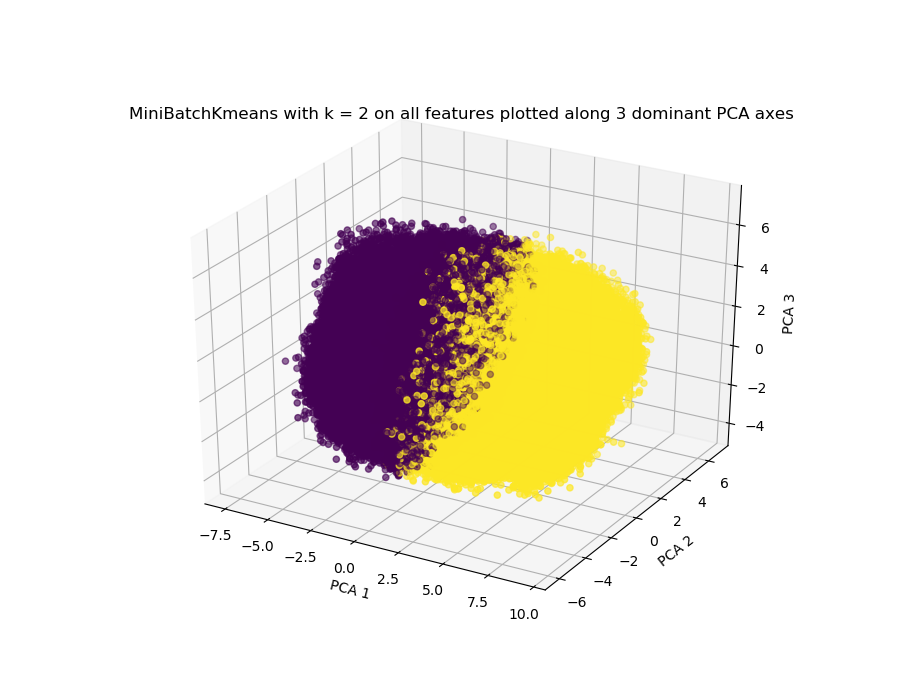

Text(0.5, 0, 'PCA 3')

In [12]:
# %matplotlib inline
#u_labels_all = np.unique(label_M_B_2)
data_PCA_3=PCA_components.iloc[:,:3] 
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(-140,60)
temp = data_PCA_3
#label_temp = np.where(label_all_features==i)
ax.scatter(xs = np.array(temp.iloc[: , 0]), ys = np.array(temp.iloc[:, 1]), zs = np.array(temp.iloc[: , 2]), c = label_M_B_2)
ax.set_title("MiniBatchKmeans with k = 2 on all features plotted along 3 dominant PCA axes")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

In [15]:
sil_MB_k_2 = silhouette_score(PCA_components.iloc[:,:2], label_M_B_2, sample_size = 50000, random_state=0)
print(f'Silhouette Score for all features using MBkmeans with k = 2: {sil_MB_k_2}')

Silhouette Score for all features using MBkmeans with k = 2: 0.387574166059494


In [16]:
M_B_kmeans_4 = MiniBatchKMeans(n_clusters=4, random_state = 0, batch_size = 50000)
label_M_B_4 = M_B_kmeans_4.fit_predict(images_w_latent)

<IPython.core.display.Javascript object>


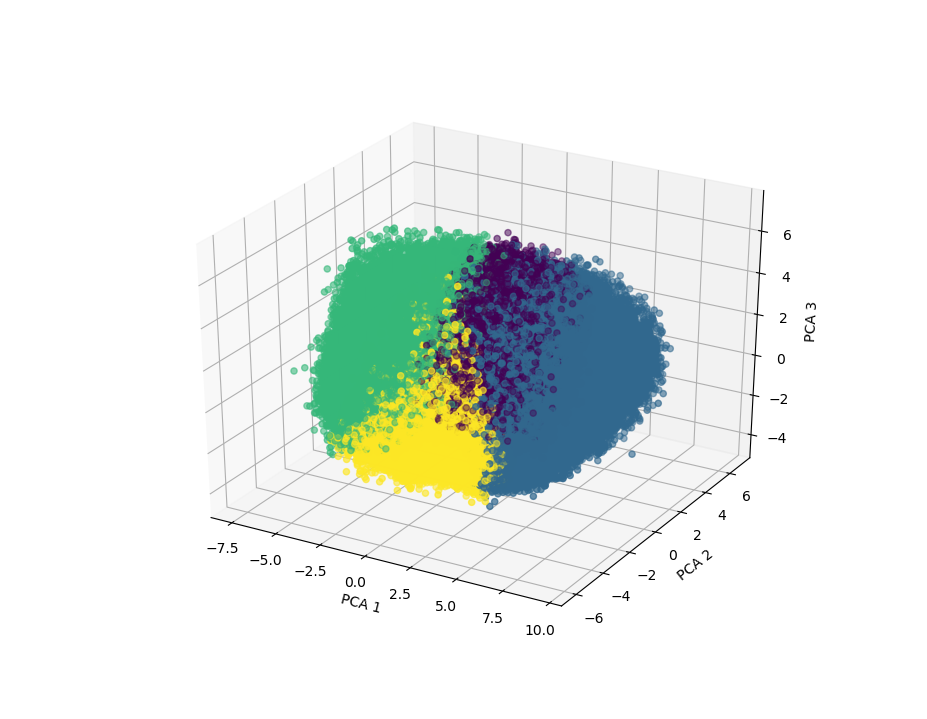

Text(0.5, 0, 'PCA 3')

In [18]:
# %matplotlib inline
data_PCA_3=PCA_components.iloc[:,:3] 
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(-140,60)
temp = data_PCA_3

ax.scatter(xs = np.array(temp.iloc[: , 0]), ys = np.array(temp.iloc[:, 1]), zs = np.array(temp.iloc[: , 2]), c = label_M_B_4)
ax.set_title("MiniBatchKmeans with k = 4 on all features plotted along 3 dominant PCA axes")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

In [19]:
sil_MB_k_4 = silhouette_score(PCA_components.iloc[:,:2], label_M_B_4, sample_size = 50000, random_state=0)
print(f'Silhouette Score for all features using MBkmeans with k = 4: {sil_MB_k_4}')

Silhouette Score for all features using MBkmeans with k = 4: 0.29205960035324097


In [106]:
# from plotly.offline import plot, iplot, init_notebook_mode
# import plotly.graph_objs as go
# init_notebook_mode (connected = True)
# from IPython.display import display
# temp = data_PCA_3
# plot_scatter = go.Scatter3d(
#     x=np.array(temp.iloc[: , 0]),
#     y=np.array(temp.iloc[:, 1]),
#     z=np.array(temp.iloc[: , 2]),
#     mode='markers',
#     marker=dict(
#         size=1,
#         color=label_all_features,
#         colorscale='Viridis',
#         opacity=0.8
#     )
# )

# plot_data = [plot_scatter]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
# fig=go.Figure(data=plot_data, layout=layout)
# #fig.show()
# iplot(fig,filename='Interactive_3dScatter.html')